In [1]:
import numpy as np
from matplotlib import pyplot as plt
import copy
from IPython.display import clear_output

np.random.seed(99)

In [40]:
# Functions related to positioning and distances

def random_ue_positions(num_ue, cov_side):
    ''' 
    Returns a random position vector within the coverage area.
    
    Parameters
    ----------
    cov_side : int, float
        The side [in m] of the coverage area.
    num_ue : int
        The number of UEs.
    '''
    
    ue_positions = np.zeros((num_ue, 2))
    
    for ue in range(num_ue):
        ue_positions[ue] = [np.random.rand() * cov_side, np.random.rand() * cov_side]
        
    return ue_positions


def ap_positions(num_ap, cov_side):
    ''' 
    Returns the APs positions based on the number of APs.
    
    Parameters
    ----------
    num_ap : int
        The number of APs.
    cov_side : int, float
        The side [in m] of coverage area.
    '''
    
    if np.sqrt(num_ap).is_integer():
        
        side_ap_quantity = int(np.sqrt(num_ap))
        
        ap_area_side = cov_side // side_ap_quantity
        
        x_pos, y_pos = np.meshgrid(np.arange(0.5 * ap_area_side,
                                             cov_side,
                                             ap_area_side),
                                   np.arange(0.5 * ap_area_side,
                                             cov_side,
                                             ap_area_side))
 
        aps_pos = np.column_stack((x_pos.ravel(), y_pos.ravel()))
    
        return aps_pos
    
    else:
        
        print('Number of APs must be a perfect square')


def distance(ue_pos, ap_pos, ref_distance=1):
    ''' 
    Returns the distance [in m] between an UE and an AP. If distance is lower than reference distance, it returns the reference distance.
    
    Parameters
    ----------
    ue_pos : int, float
        The UE position.
    ap_pos : int, float
        The AP position.
    ref_distance : int, float
        The reference distance [in m] from which the gain is calculated.
    '''

    dis_matrix = np.zeros((ue_pos.shape[0], ap_pos.shape[0]))
    
    for ue in range(ue_pos.shape[0]):
        for ap in range(ap_pos.shape[0]):
            dis = np.sqrt(((ue_pos[ue])[0] - (ap_pos[ap])[0])**2
                          + ((ue_pos[ue])[1] - (ap_pos[ap])[1])**2)

            if dis >= ref_distance:
                dis_matrix[ue, ap] = dis
            else:
                dis_matrix[ue, ap] = ref_distance

    return dis_matrix

def closest_AP(UE, AP_list):

    # Find the closest AP from the AP list to the UE in parameter.

    # Set a number that tends to infinity as minimun distance and 
    # creates a variable to store the closest AP.
    min_distance = float('inf')
    closestAP = 0

    # For each AP in the list, it checks if its distance to UE is 
    # less than the "min_distance" value and changes if it is. 
    # It also change the AP object stored in "closestAP" variable
    # for that one.
    for AP in AP_list:
        dis = np.sqrt((UE[0] - AP[0])**2 + ((UE[1] - AP[1])**2))
        if dis < min_distance:
            min_distance = dis
                    
            closestAP = AP
                    
    return closestAP

In [25]:
num_ue = 2
num_ap = 16
cov_area = 400

ue_pos = random_ue_positions(num_ue, cov_area)
ap_pos = ap_positions(num_ap, cov_area)

In [38]:
ap_pos

array([[ 50.,  50.],
       [150.,  50.],
       [250.,  50.],
       [350.,  50.],
       [ 50., 150.],
       [150., 150.],
       [250., 150.],
       [350., 150.],
       [ 50., 250.],
       [150., 250.],
       [250., 250.],
       [350., 250.],
       [ 50., 350.],
       [150., 350.],
       [250., 350.],
       [350., 350.]])

In [42]:
closest_AP(ue_pos[0], ap_pos)

array([150., 150.])

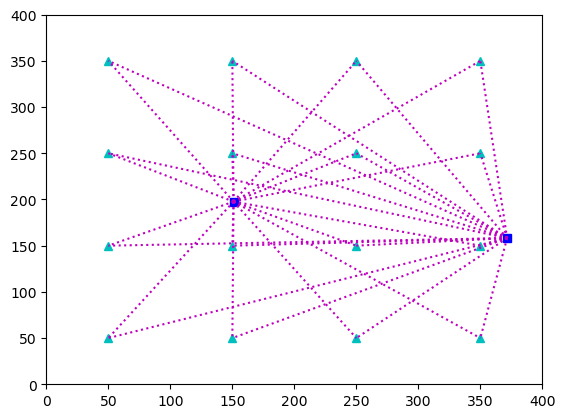

In [28]:
for pos in range(num_ue):
    plt.plot(ue_pos[pos][0], ue_pos[pos][1], 'bs')

for pos in range(num_ap):
    plt.plot(ap_pos[pos][0], ap_pos[pos][1], 'c^')

plt.xlim(0, 400)
plt.ylim(0, 400)

for ue in range(num_ue):
    for ap in range(num_ap):
        x_values = ue_pos[ue][0], ap_pos[ap][0]
        y_values = ue_pos[ue][1], ap_pos[ap][1]
        plt.plot(x_values, y_values, 'm:')

plt.savefig('cellfree_scenario_SBrT2024.jpg')

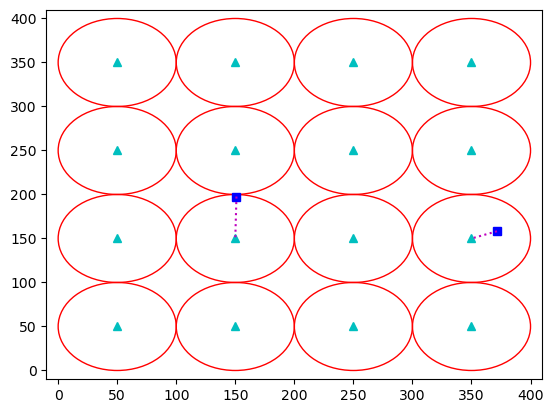

In [44]:
for pos in range(num_ue):
    plt.plot(ue_pos[pos][0], ue_pos[pos][1], 'bs')

for pos in range(num_ap):
    plt.plot(ap_pos[pos][0], ap_pos[pos][1], 'c^')

    circle = plt.Circle(ap_pos[pos], 50, color='r', fill=False)
    plt.gca().add_patch(circle)


plt.xlim(-10, 410)
plt.ylim(-10, 410)

for ue in range(num_ue): 
    x_values = ue_pos[ue][0], closest_AP(ue_pos[ue], ap_pos)[0]
    y_values = ue_pos[ue][1], closest_AP(ue_pos[ue], ap_pos)[1]
    plt.plot(x_values, y_values, 'm:')

plt.savefig('cellfree_scenario_SBrT2024.jpg')